# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multilayer ANNs
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

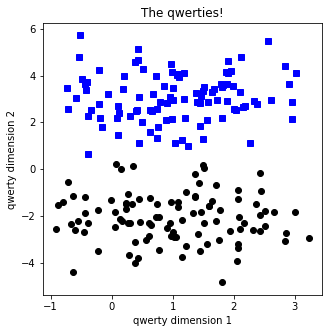

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [3]:
class ANNModel(nn.Module):
    
    def __init__(self,nLayers,nUnits):
        super().__init__()

        #dictionary to store layers 
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers

        #input
        self.layers["input"] = nn.Linear(2,nUnits)

        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits,nUnits)
        
        #output
        self.layers['output'] = nn.Linear(nUnits,2)
    
    def forward(self,x):
        x = F.relu( self.layers['input'](x))

        for i in range(self.nLayers):
            x = F.relu( self.layers[f'hidden{i}'](x))
        
        x = self.layers['output'](x)

        return x

In [4]:
nUnitsPerLayer = 12
nLayers = 4
net = ANNModel(nLayers,nUnitsPerLayer)
net

ANNModel(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=2, bias=True)
  )
)

In [5]:
tmp = torch.randn(10,2)
y = net(tmp)
print(y.shape)
print(y)

torch.Size([10, 2])
tensor([[0.0012, 0.2450],
        [0.0015, 0.2455],
        [0.0015, 0.2452],
        [0.0023, 0.2417],
        [0.0020, 0.2441],
        [0.0070, 0.2519],
        [0.0011, 0.2468],
        [0.0003, 0.2420],
        [0.0026, 0.2437],
        [0.0008, 0.2434]], grad_fn=<AddmmBackward0>)


In [6]:
def trainTheModel(theModel):
  
  # define the loss function and optimizer
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(theModel.parameters(),lr=.01)

  # loop over epochs
  for epochi in range(numepochs):

    # forward pass
    yHat = theModel(data)

    # compute loss
    loss = lossfun(yHat,labels)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  
  
  # final forward pass to get accuracy
  predictions = theModel(data)
  predlabels = torch.argmax(predictions,axis=1)
  acc = 100*torch.mean((predlabels == labels).float())

  # total number of trainable parameters in the model
  nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

  # function outputs
  return acc,nParams

In [7]:
numepochs = 2500
acc = trainTheModel(net)

# tuple containing (accuracy,nparams)
acc 

(tensor(100.), 686)

In [8]:
from torchinfo import summary
summary(net)

Layer (type:depth-idx)                   Param #
ANNModel                                 --
├─ModuleDict: 1-1                        --
│    └─Linear: 2-1                       36
│    └─Linear: 2-2                       156
│    └─Linear: 2-3                       156
│    └─Linear: 2-4                       156
│    └─Linear: 2-5                       156
│    └─Linear: 2-6                       26
Total params: 686
Trainable params: 686
Non-trainable params: 0